# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [212]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
df.dtypes

Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64
dtype: object

In [4]:
(df.isnull().sum() / len(df)) * 100

Valor_Aluguel       0.0
Valor_Condominio    0.0
Metragem            0.0
N_Quartos           0.0
N_banheiros         0.0
N_Suites            0.0
N_Vagas             0.0
dtype: float64

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [6]:
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


In [ ]:
# Vejo que a categoria Valor_Condominio tem uma minima 0, irei verificar isso.
# Também vi que a média e media nas categorias Valor_Aluguel, Valor_Condominio e Metragem estão bem desbalanceadas]
# Acredito também que nas variaveis N_Quartos, N_banheiros	N_Suites e N_Vagas tenha sim outliers, porém apenas valores reais muito acima do esperado

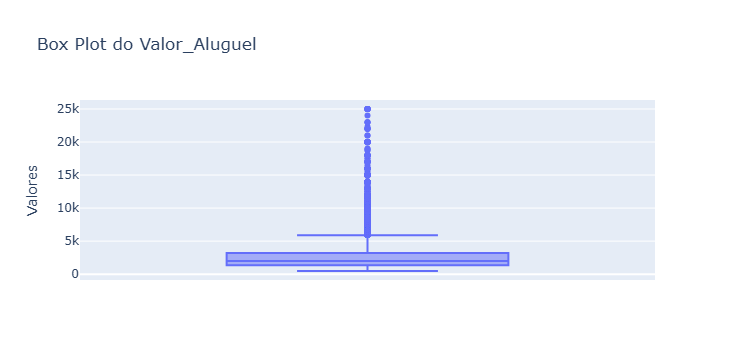

In [89]:
fig = px.box(df, y='Valor_Aluguel', title='Box Plot do Valor_Aluguel', labels={'Valor_Aluguel': 'Valores'})
fig.show()

In [ ]:
# Notamos que temos fortes presenças de valores fora da normalidade dos dados

In [ ]:
# A variável Valor_Aluguel parece ter um comportamento diferente, mas acredito que sejam muitos alugueis de diferentes preços, em um curto espaço.
# Preços diferentes em um curto espaço, ou seja, uma casa ou duas estão variando o preço, uma é 2000 o aluguel e logo a proxima já é 2100 e por ai vai, por esse motivo que vemos o boxplot assim.
# Dificlmente vamos ver algo balanceavel com alugueis acredito eu, porque é muito dificl ter dados de alugueis e boa parte deles serem iguais, sempre vair variaer, por esse motivo o desb

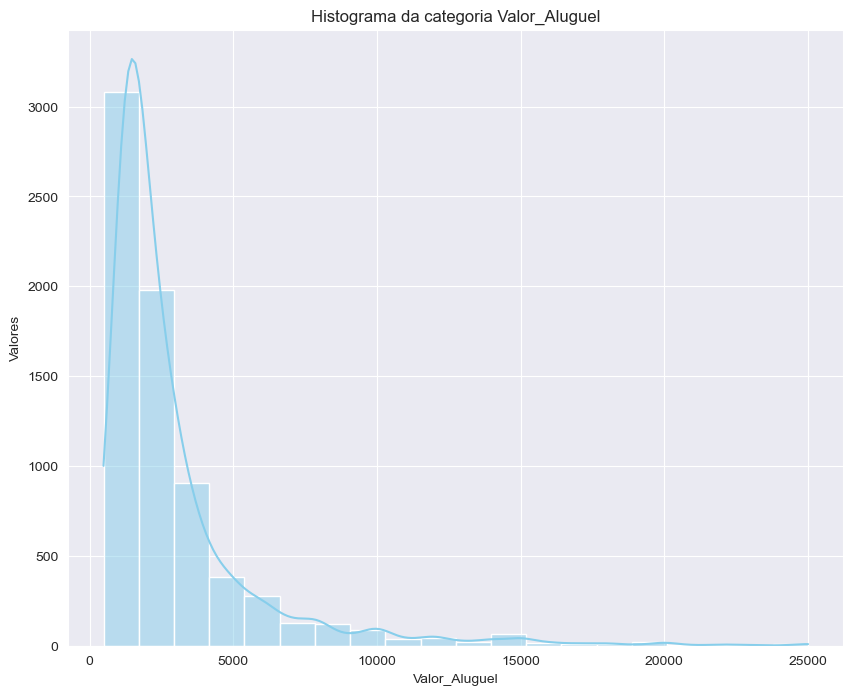

In [101]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Valor_Aluguel", bins=20, kde=True, color="skyblue")
plt.title("Histograma da categoria Valor_Aluguel")
plt.xlabel("Valor_Aluguel")
plt.ylabel("Valores")
plt.show()

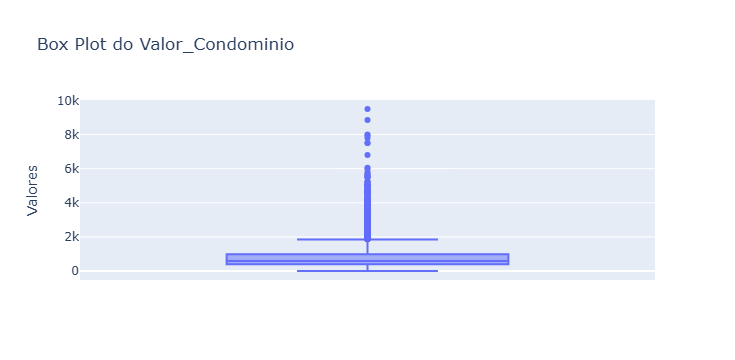

In [92]:
fig = px.box(df, y='Valor_Condominio', title='Box Plot do Valor_Condominio', labels={'Valor_Condominio': 'Valores'})
fig.show()

In [ ]:
# Aqui podemos ver algo pareceido também, pórem com dois outliers mais distantes no valor de 9500 e no valor de 8860, porém mesmo que eles sejam excluidos avera também outros mais abaixo pelo desbalanceamento.
# São preços um pouco mais acima, porém mesmo que eu exclua, logo depois avera mais pelo fato dos valores serem diferentes em um curto espaço.

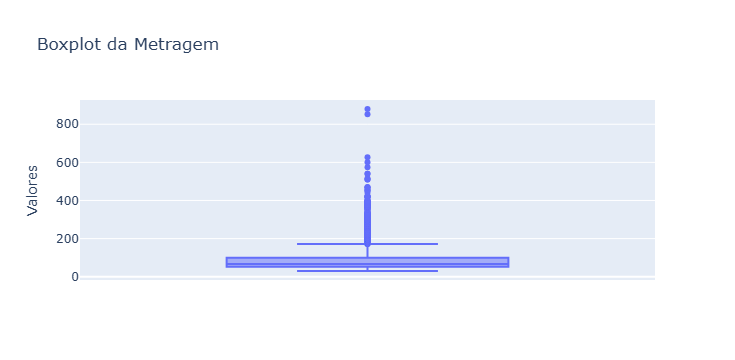

In [93]:
fig = px.box(df, y="Metragem", title="Boxplot da Metragem", labels={"Metragem": "Valores"})
fig.show()

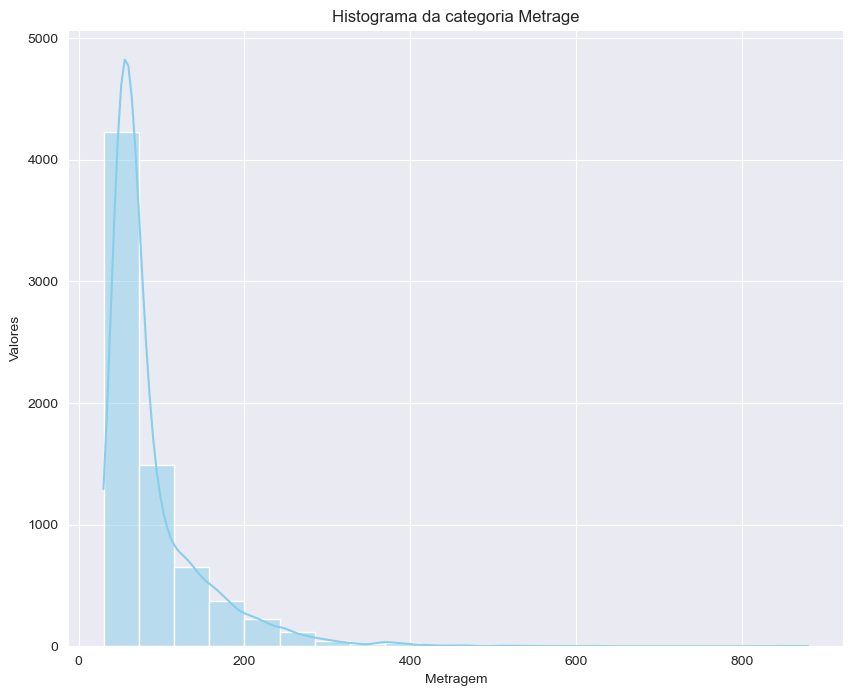

In [97]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Metragem", bins=20, kde=True, color="skyblue")
plt.title("Histograma da categoria Metrage")
plt.xlabel("Metragem")
plt.ylabel("Valores")
plt.show()

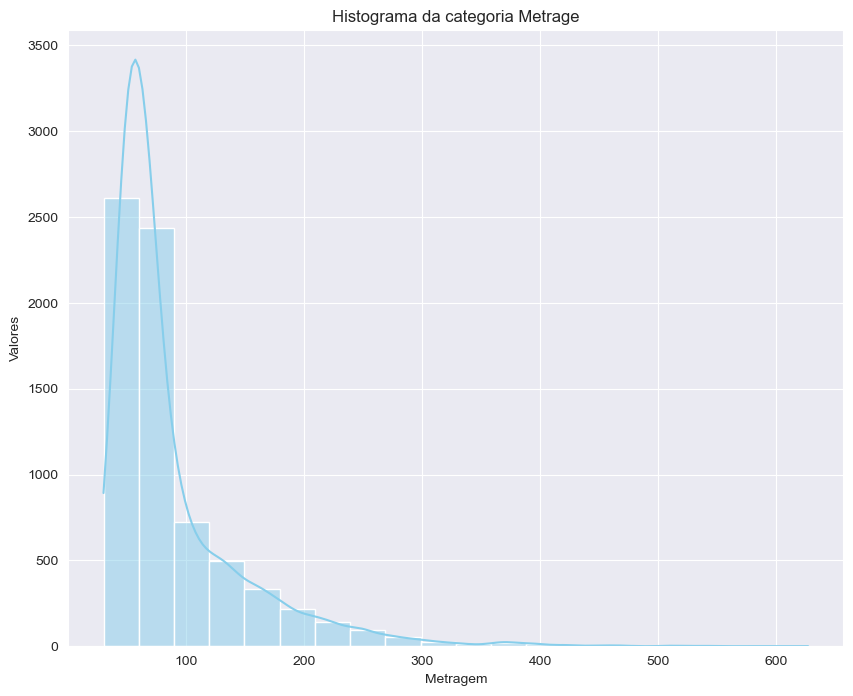

In [98]:
df_abaixo = df[df["Metragem"] < 852]

sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
sns.histplot(data=df_abaixo, x="Metragem", bins=20, kde=True, color="skyblue")
plt.title("Histograma da categoria Metrage")
plt.xlabel("Metragem")
plt.ylabel("Valores")
plt.show()

In [ ]:
# Ok, aqui vejo que tem dois valores mais distante do que a maioria, e eles eu irei substituir pela media ou mediana.
# A diferença desses dois valores acima para os outros das outras categorias, é que você consegue ver que estão todos em fileira, da pra ver que são preços diferentes em um curto espaço, ou seja, um preço diferente um em cima do outro.
# Já aqui você vê que são valores que estão bem distante dessa fileira que sobe no box plot

In [99]:
df["Metragem"].mean()

88.50617798139665

In [100]:
df["Metragem"].median()

67.0

In [115]:
Metragem_mediana = df[df["Metragem"] < 627]
Metragem_mediana["Metragem"].median()

67.0

In [116]:
mediana_Metragem_abaixo = df[df["Metragem"] < 627]["Metragem"].median()
df.loc[df["Metragem"] > 627, "Metragem"] = mediana_Metragem_abaixo

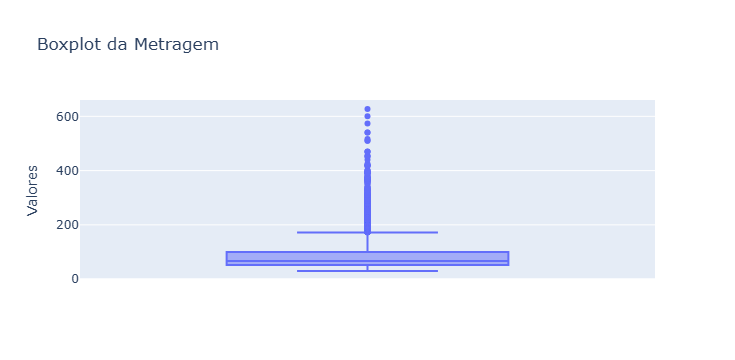

In [117]:
fig = px.box(df, y="Metragem", title="Boxplot da Metragem", labels={"Metragem": "Valores"})
fig.show()

In [118]:
Metragem_mediana["Metragem"].median()
# A mediana não mudou nada 

67.0

In [ ]:
# Agora aqui a gente não vê mais um espaçamento que nem antes, continua aquela linha pra cima, dando a entender que as metragens variam logo um em cima da outra.
# Se a gente tivesse todas as metragens balanceadas no mesmo nivel as casas seriam todas iguais não é mesmo? então essa quantidade de poontos pra cima é normal,

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [4]:
df.corr()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.695302,0.730591,0.413139,0.603715,0.614397,0.652858
Valor_Condominio,0.695302,1.000000,0.805926,0.497420,0.585795,0.589244,0.690993
Metragem,0.730591,0.805926,1.000000,0.678091,0.687558,0.696281,0.743872
N_Quartos,0.413139,0.497420,0.678091,1.000000,0.553807,0.540887,0.591224
N_banheiros,0.603715,0.585795,0.687558,0.553807,1.000000,0.920149,0.694983
N_Suites,0.614397,0.589244,0.696281,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.652858,0.690993,0.743872,0.591224,0.694983,0.712054,1.000000


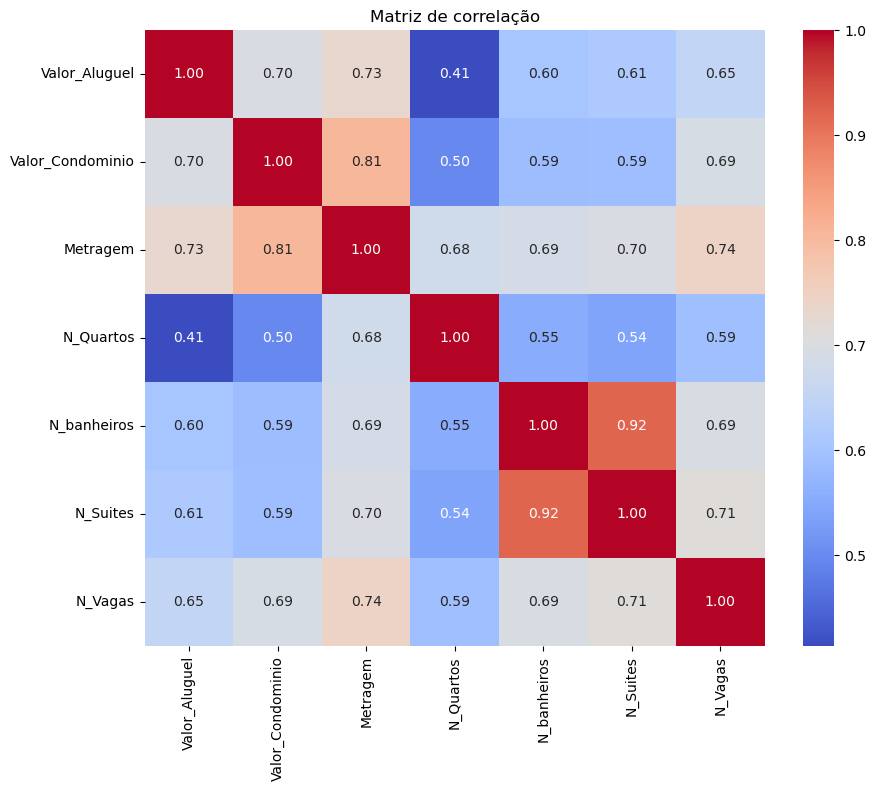

In [7]:
correlation_matrix = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlação")            
plt.show()

In [ ]:
# Vejo fortes correlações altas nas categorias N_Suits e N_Banheiro e na Metragem e Valor_Condominio
# Vejo também fortes correlações abaixo do 0.5 entre N_Quarto e Valor_Aluguel


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [14]:
x = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [15]:
# Pelo visto a biblioteca já está importada, então já irei fazer a separação
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [16]:
# Antes de tudo irei verificar se está tudo certo
x_train

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
6931,1350,176,3,4,3,3
4125,680,70,1,1,0,2
6079,650,66,2,1,0,1
5044,655,68,3,2,1,1
2299,330,33,1,1,0,1
...,...,...,...,...,...,...
3772,450,48,2,2,1,1
5191,570,34,1,1,0,1
5226,976,95,2,2,1,1
5390,550,74,3,3,1,2


In [17]:
x_test

,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
3885,484,50,2,1,0,1
4661,680,50,2,1,0,1
1038,0,58,2,2,1,1
5867,1226,127,3,1,0,2
5099,697,90,4,3,1,2
...,...,...,...,...,...,...
4689,1250,160,3,3,1,2
5313,530,43,1,2,1,1
5624,1250,147,4,4,2,3
4647,650,53,2,1,0,1


In [18]:
y_train

6931    10000
4125     2200
6079     4500
5044     2900
2299     1500
        ...  
3772     2000
5191     3000
5226     3000
5390     3200
860      1100
Name: Valor_Aluguel, Length: 5402, dtype: int64

In [19]:
y_test

3885    2100
4661    2500
1038    1200
5867    4000
5099    3000
        ... 
4689    2550
5313    3100
5624    3500
4647    2500
4453    2500
Name: Valor_Aluguel, Length: 1801, dtype: int64

In [112]:
print("Tamanho do x_train", x_train.shape)

Tamanho do x_train (5402, 6)


In [113]:
print("Tamanho do x_test", x_test.shape)

Tamanho do x_test (1801, 6)


In [275]:
print("Tamanho do y_train", y_train.shape) 

Tamanho do y_train (5402,)


In [115]:
print("Tamanho do y_test", y_test.shape)

Tamanho do y_test (1801,)


# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [290]:
x = x_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [291]:
regressao_metragem = LinearRegression()

regressao_metragem.fit(x,y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [292]:
regressao_metragem.intercept_

-103.17820863080124

In [293]:
regressao_metragem.coef_

array([34.70818769])

In [294]:
# Nossa equação seria: Valor_Aluguel=−103.18+34.71⋅Metragem  
# A cada metragem aumentada o valor do aluguel sobe mais 34 reais, e o valor por sí dos alugueis seria 0
# já que o aluguel não pode ser negativo. Esse valor negativo é um reflexo de como o modelo tenta se ajustar aos dados, e não uma representação direta do mundo real.

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [295]:
regressao_metragem.score(x,y)

0.5213271756253639

In [296]:
# Acredito que a metragem não seja uma boa variavel independente.
# até pelo fato de que a correlação que ela tem com o valor de aluguel não é um correlação positiva

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

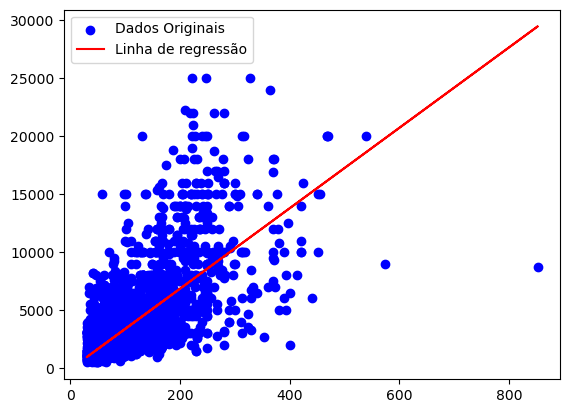

In [297]:
plt.scatter(x, y, color="blue", label="Dados Originais")

# Plotar a linha de regressãoa
plt.plot(x, regressao_metragem.predict(x), color="red", label="Linha de regressão")
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [126]:
previssoes = regressao_metragem.predict(x)
previssoes

array([6005.46282439, 2326.3949295 , 2187.56217875, ..., 3194.09962169,
       2465.22768025, 1562.81480038])

In [125]:
y

6931    10000
4125     2200
6079     4500
5044     2900
2299     1500
        ...  
3772     2000
5191     3000
5226     3000
5390     3200
860      1100
Name: Valor_Aluguel, Length: 5402, dtype: int64

In [130]:
# comparar as previsões com os valores reais
comparacao = pd.DataFrame({'Valor Real': y_train, 'Previsão': predicoes})

# Exibindo as primeiras linhas da comparação
print(comparacao.head())  

      Valor Real     Previsão
6931       10000  6005.462824
4125        2200  2326.394930
6079        4500  2187.562179
5044        2900  2256.978554
2299        1500  1042.191985


In [ ]:
# Como eu disse, a correlação entre Metragem e valor de aluguel eram baixa , já era de se esperar um previsão ruim.
# Acredito que se as previsões fossem atraves de variaveis com correlações altas o R2 seria entre 0.8 ou 0.9

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [131]:
x_test = x_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [136]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previssoes = regressao_metragem.predict(x_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = regressao_metragem.score(x_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.5651600449476675


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Escreva sua resposta aqui.

In [ ]:
# O valor de r foi de 0.56, e acredito que isso tenha acontecido pelo fato de varialvel unica e independente que testamos, tenha uma correlação baixa como o Valor de aluguel.
# Agora acredito que quando seja testato com uma variavel com uma correlação boa, acredito que o nivel do r subiria.
# Acredito que quando eu faça uma regressão linear multipla, o resultado seja melhor.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [281]:
x_train = x_train
y_train = y_train

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [282]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(x_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [283]:
regressao_multipla.score(x_train, y_train)

0.5971610197647366

D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [284]:
x_test = x_test 
y_test = y_test

In [285]:
previssoes = regressao_multipla.predict(x_test)
r2 = regressao_multipla.score(x_test, y_test)
print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)

Coeficiente de Determinação (R²) nos Dados de Teste: 0.6072329037304596


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

In [286]:
# Acredito que mudou um pouco pelo fato de que se tem mais variaveis na regressão linear, porém a unica variavel que tem uma correlação grande com valor de aluguel é a Metragem, e mesmo assim não é tão alta
# O resto tem mais correlações como os valores do condomio, porém todas elas juntas pelo visto aumenta mais o resultado
# Talvez o que tenha tirado essa correlação um pouco maior na metragem, foram os dois outliers que eu substitui, caso os tutores acreditem que isso tenha sido um erro, gostaria que me falassem, porém prefiro errar aqui do que em